# Playground

## Install Dependencies

## Import Dependencies

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Load Parquet Data

In [107]:
# load example parquet file
df = pd.read_parquet('../data/asl-signs/train_landmark_files/16069/100015657.parquet')
df.shape

(57015, 7)

In [108]:
df.head()

,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57015 entries, 0 to 57014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           57015 non-null  int16  
 1   row_id          57015 non-null  object 
 2   type            57015 non-null  object 
 3   landmark_index  57015 non-null  int16  
 4   x               53193 non-null  float64
 5   y               53193 non-null  float64
 6   z               53193 non-null  float64
dtypes: float64(3), int16(2), object(2)
memory usage: 2.4+ MB


In [110]:
df.describe() # doesn't make much sense

,frame,landmark_index,x,y,z
count,57015.00000,57015.000000,53193.000000,53193.000000,53193.000000
mean,155.00000,202.994475,0.438283,0.457483,-0.047699
std,30.30978,146.791506,0.115117,0.268900,0.294060
min,103.00000,0.000000,-0.042923,0.248094,-2.838325
25%,129.00000,60.000000,0.372952,0.361456,-0.039124
50%,155.00000,196.000000,0.424128,0.409588,-0.009181
75%,181.00000,332.000000,0.489478,0.474334,0.025908
max,207.00000,467.000000,1.197836,2.591290,1.587503


## Visualizing Single Frame

/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


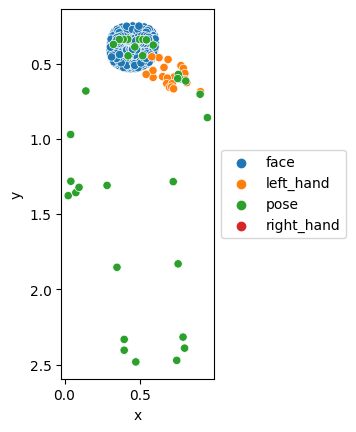

In [111]:
x = df[df.frame == 103].x
y = df[df.frame == 103].y
fig = sns.scatterplot(x, y, hue=df[df.frame == 103].type)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.gca().invert_yaxis()
plt.axis('scaled')
plt.show(fig)

## Distribution of Frames per Sign

In [112]:
# load train.csv annotation file
df_train = pd.read_csv('../data/asl-signs/train.csv')
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [113]:
# load first parquet file in train.csv
i = 1
df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])

In [114]:
n_frames = df_parquet.frame.nunique()
sign = df_train.sign[i]
n_frames, sign

(11, 'wait')

In [115]:
df_train.shape[0]

94477

In [116]:
""" # list comprehension loop over all rows in train.csv dataframe to get the number of frames
i_max = 1000
n_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] """

" # list comprehension loop over all rows in train.csv dataframe to get the number of frames\ni_max = 1000\nn_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] "

In [117]:
i_min = 0
i_max = df_train.shape[0]
i_max = 68368 # parquet file in row 68369 is corrupted
n_frames_all = [] # container for all numbe rof frames

# loop over all rows in train.csv dataframe to get the number of frames
for i in range(i_min, i_max): 
    if i == 0:
        print(i)
    if i%100 == 0: 
        print(i)
    if i == i_max: 
        print(i)
    df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])
    n_frames = df_parquet.frame.nunique()
    n_frames_all.append(n_frames)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

```python
loop interrupted at i = 68369 with error message: 

Output exceeds the size limit. Open the full output data in a text editor---------------------------------------------------------------------------
ArrowInvalid                              Traceback (most recent call last)
Cell In[117], line 9
      7 if i%100 == 0: 
      8     print(i)
----> 9 df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])
     10 n_frames = df_parquet.frame.nunique()
     11 n_frames_all.append(n_frames)

File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pandas/io/parquet.py:495, in read_parquet(path, engine, columns, storage_options, use_nullable_dtypes, **kwargs)
    442 """
    443 Load a parquet object from the file path, returning a DataFrame.
    444 
   (...)
    491 DataFrame
    492 """
    493 impl = get_engine(engine)
--> 495 return impl.read(
    496     path,
    497     columns=columns,
    498     storage_options=storage_options,
    499     use_nullable_dtypes=use_nullable_dtypes,
    500     **kwargs,
    501 )
...
File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pyarrow/error.pxi:144, in pyarrow.lib.pyarrow_internal_check_status()

File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pyarrow/error.pxi:100, in pyarrow.lib.check_status()

ArrowInvalid: Could not open Parquet input source '': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
```


In [130]:
df_train.loc[68369]

path              train_landmark_files/53618/3802108680.parquet
participant_id                                            53618
sequence_id                                          3802108680
sign                                                      dirty
Name: 68368, dtype: object

path              train_landmark_files/28656/3802134503.parquet
participant_id                                            28656
sequence_id                                          3802134503
sign                                                      cloud
Name: 68369, dtype: object

In [131]:
os.path.isfile('../data/asl-signs/train_landmark_files/28656/3802134503.parquet')

True

In [ ]:
#test = pd.read_parquet('../data/asl-signs/train_landmark_files/28656/3802134503.parquet')

```python
Output exceeds the size limit. Open the full output data in a text editor---------------------------------------------------------------------------
ArrowInvalid                              Traceback (most recent call last)
Cell In[132], line 1
----> 1 test = pd.read_parquet('../data/asl-signs/train_landmark_files/28656/3802134503.parquet')

File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pandas/io/parquet.py:495, in read_parquet(path, engine, columns, storage_options, use_nullable_dtypes, **kwargs)
    442 """
    443 Load a parquet object from the file path, returning a DataFrame.
    444 
   (...)
    491 DataFrame
    492 """
    493 impl = get_engine(engine)
--> 495 return impl.read(
    496     path,
    497     columns=columns,
    498     storage_options=storage_options,
    499     use_nullable_dtypes=use_nullable_dtypes,
    500     **kwargs,
    501 )

File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pandas/io/parquet.py:239, in PyArrowImpl.read(self, path, columns, use_nullable_dtypes, storage_options, **kwargs)
    232 path_or_handle, handles, kwargs["filesystem"] = _get_path_or_handle(
    233     path,
    234     kwargs.pop("filesystem", None),
...
File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pyarrow/error.pxi:144, in pyarrow.lib.pyarrow_internal_check_status()

File ~/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/pyarrow/error.pxi:100, in pyarrow.lib.check_status()

ArrowInvalid: Could not open Parquet input source '': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
```

What the hell..., parquet file exists, but cannot be read! :D

Row 68369 is a corrupt parquet file? Append nan to list with all number of frames

In [148]:
n_frames_all.append(np.nan)


Continue with loop from 68370 on. 

In [150]:
i_min = 68370 # parquet file in row 68369 is corrupted and was skipped
i_max = df_train.shape[0]

# continued loop over all rows in train.csv dataframe to get the number of frames
for i in range(i_min, i_max): 
    if i == i_min:
        print(i)
    if i%100 == 0: 
        print(i)
    if i == i_max: 
        print(i)
    df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])
    n_frames = df_parquet.frame.nunique()
    n_frames_all.append(n_frames)

68400
68500
68600
68700
68800
68900
69000
69100
69200
69300
69400
69500
69600
69700
69800
69900
70000
70100
70200
70300
70400
70500
70600
70700
70800
70900
71000
71100
71200
71300
71400
71500
71600
71700
71800
71900
72000
72100
72200
72300
72400
72500
72600
72700
72800
72900
73000
73100
73200
73300
73400
73500
73600
73700
73800
73900
74000
74100
74200
74300
74400
74500
74600
74700
74800
74900
75000
75100
75200
75300
75400
75500
75600
75700
75800
75900
76000
76100
76200
76300
76400
76500
76600
76700
76800
76900
77000
77100
77200
77300
77400
77500
77600
77700
77800
77900
78000
78100
78200
78300
78400
78500
78600
78700
78800
78900
79000
79100
79200
79300
79400
79500
79600
79700
79800
79900
80000
80100
80200
80300
80400
80500
80600
80700
80800
80900
81000
81100
81200
81300
81400
81500
81600
81700
81800
81900
82000
82100
82200
82300
82400
82500
82600
82700
82800
82900
83000
83100
83200
83300
83400
83500
83600
83700
83800
83900
84000
84100
84200
84300
84400
84500
84600
84700
84800
84900
8500

In [161]:
len(n_frames_all), len(df_train.sign)

(94477, 94477)

In [167]:
n_frames_all = pd.Series(n_frames_all, name='n_frames')
type(test), type(df_train.sign)

(pandas.core.series.Series, pandas.core.series.Series)

In [168]:
test, df_train.sign

(0         23.0
 1         11.0
 2        105.0
 3         12.0
 4         18.0
          ...  
 94472     49.0
 94473      6.0
 94474     37.0
 94475     34.0
 94476     33.0
 Length: 94477, dtype: float64,
 0          blow
 1          wait
 2         cloud
 3          bird
 4          owie
           ...  
 94472     white
 94473      have
 94474    flower
 94475      room
 94476     happy
 Name: sign, Length: 94477, dtype: object)

In [170]:
df_frames = pd.concat([n_frames_all, df_train.sign], axis=1)

Getting all number of frames took about 6-7 minutes. So let's save it into a .csv file

In [173]:
df_frames.to_csv('../data/n_frames.csv', index=False)

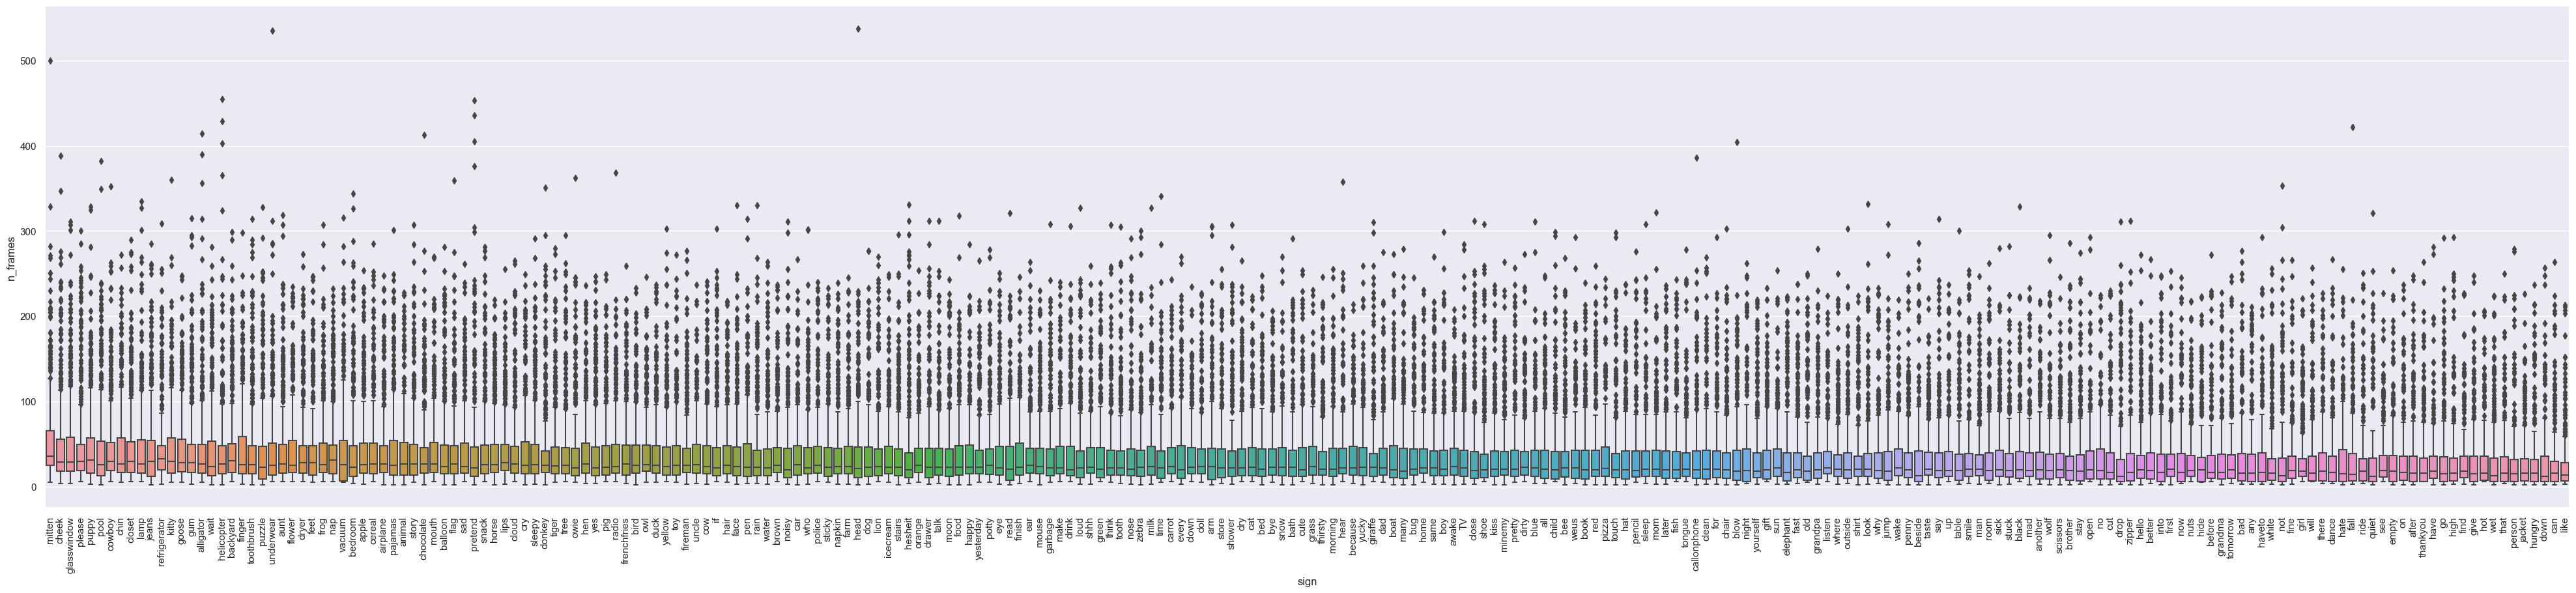

In [220]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

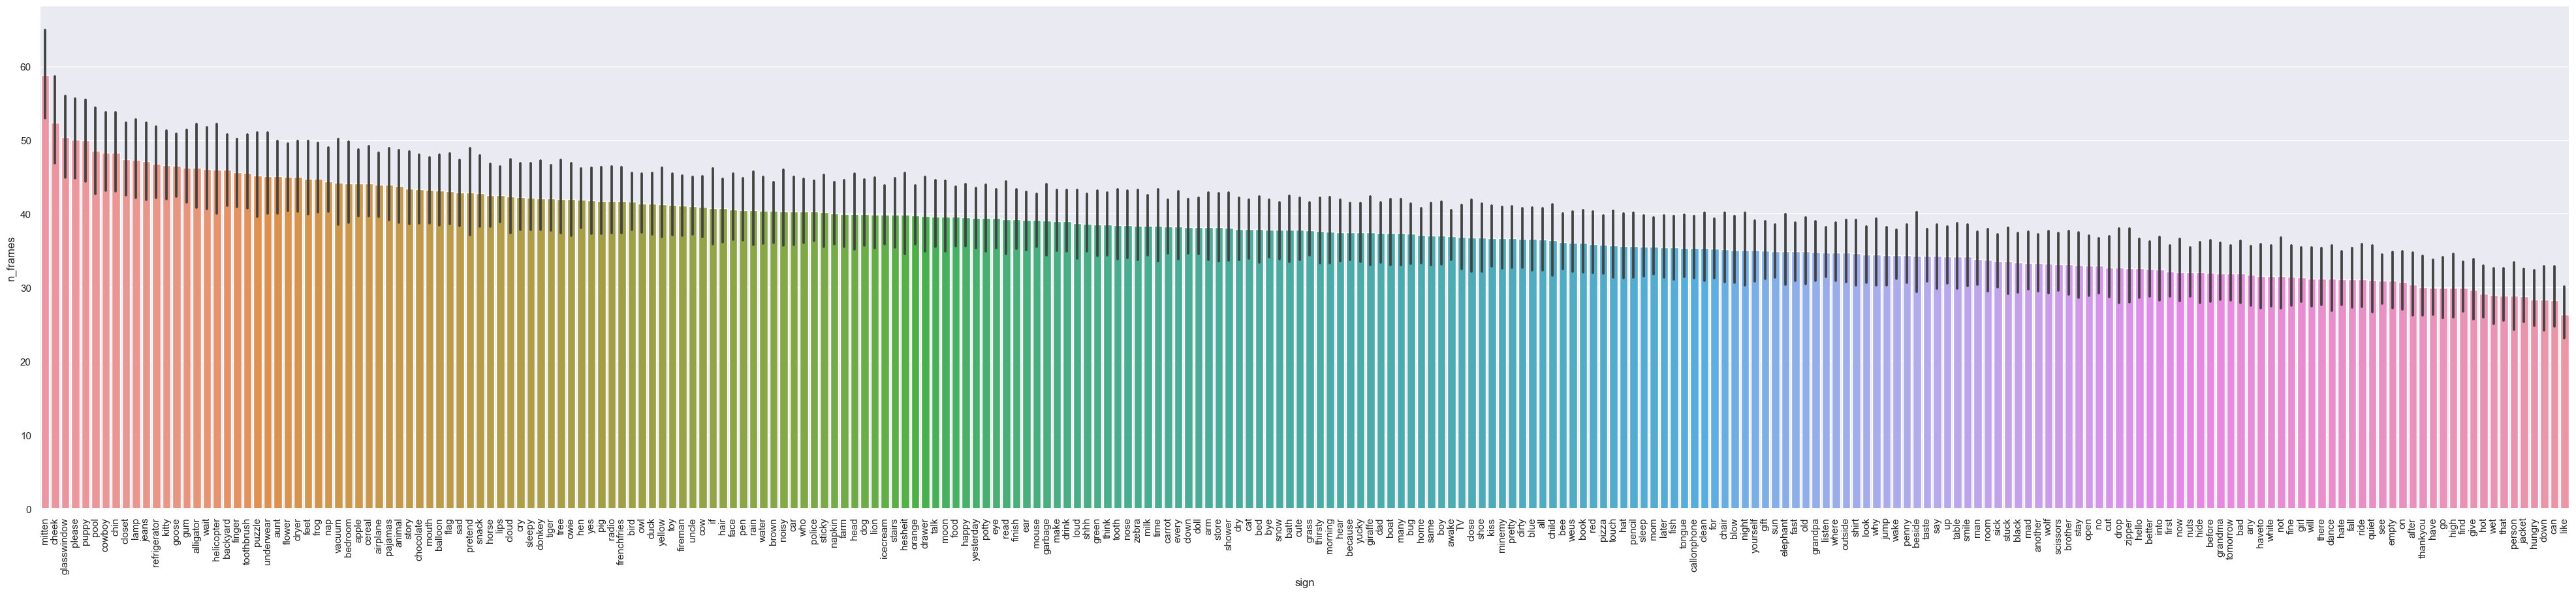

In [219]:
# order by increasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()
